# Exercises
**This homework focuses on training and evaluating prediction models for a particular problem
and dataset.**
The data comes from the Centers for Disease Control and Prevention (CDC:
https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in
charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases,
deaths, and trends of COVID-19 in the United States. CDC collects and makes public deidentified
individual-case data on a daily basis, submitted using standardized case reporting forms. In
this analysis, we focus on using the data collected by CDC to build a data analytics solution
for death risk prediction.
The dataset we work with is a sample of the public data released by CDC, where the outcome for
the target feature **death_yn** is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf
The goal in this homework is to work with the data to build and evaluate prediction models that
capture the relationship between the descriptive features and the target feature **death_yn**.
For this homework you are asked to use the same dataset allocated to you in Homework1 (you can
use your cleaned/prepared CSV from Homework1 or start from the raw dataset, clean it according
to concepts covered in the lectures/labs, then use it for training prediction models). To use
the 2 individual files allocated for Homework1, you can merge them first, then clean the
resulting dataset, before starting on Homework2 requirements.
There are 5 parts for this homework. Each part has an indicative maximum percentage given in
brackets, e.g., part (1) has a maximum of 25% shown as [25]. The total that can be achieved is
100.

### Our Group has 2 members: Suwen JIN 22205419 and Peijin JIANG 22202041

### Task 1-3 are primarily finished by Peijin JIANG while Task 4-5 are primarily finished by Suwen JIN.

# (1) Data understanding and prep:

## (1.0) merge and clean the two csv files.

In [110]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## The code above is really necessary so that we copy it here from Assignment 1

In [111]:
# Merge my csv file and JIN's csv file from Assignment 1
# Read in data from both CSV files
df1 = pd.read_csv('covid19-cdc-22202041.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df2 = pd.read_csv('covid19-cdc-22205419.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# Concatenate the two dataframes
merged_df = pd.concat([df1, df2], axis=0)

# Save the merged dataframe to a new CSV file
merged_df.to_csv('covid19-cdc-22202041_and_22205419.csv', index=False)

*Read the merged csv file and do something simple check as Assignment 1.

In [112]:
df = pd.read_csv('covid19-cdc-22202041_and_22205419.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [113]:
df.shape

(40000, 19)

In [114]:
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,KY,21.0,JEFFERSON,21111.0,65+ years,Male,White,Non-Hispanic/Latino,2.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Yes
1,2021-06,TX,48.0,DALLAS,48113.0,Missing,Male,Black,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2,2021-11,MO,29.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Yes,NaN
3,2020-07,FL,12.0,PALM BEACH,12099.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
4,2020-11,KS,20.0,RENO,20155.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,NaN


In [115]:
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
39995,2020-08,MD,24.0,BALTIMORE,24005.0,50 to 64 years,Male,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
39996,2021-12,MN,27.0,BELTRAMI,27007.0,0 - 17 years,Male,American Indian/Alaska Native,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,NaN
39997,2021-08,IN,18.0,HAMILTON,18057.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
39998,2020-07,ID,16.0,ADA,16001.0,18 to 49 years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
39999,2022-01,VA,51.0,SMYTH,51173.0,0 - 17 years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN


*Convert features to appropriate datatypes

In [116]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

*Based on examining the data in a spreadsheet program, 2 of the features are continuous and the rest are categorical.

In [117]:
# Select columns containing categorical data
# These colums were chosen as categories because 
# there data contains single or multiple digit values each representing a different meaning
# rather than they can be shown as a numerical and continuous values.
# So they can't be continuous.
categorical_columns = df[['case_month','res_state','state_fips_code','res_county','county_fips_code','age_group','sex','race','ethnicity','process','exposure_yn','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

*Check for duplicate row/columns

In [118]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  3700
Number of duplicate rows (including first) in the table is: 6283


In [119]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


*Duplicate rows can be seen below

In [120]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)]

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
1,2021-06,TX,48.0,DALLAS,48113.0,Missing,Male,Black,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
8,2021-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,Asian,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Yes,Yes,NaN
10,2020-12,VA,51.0,SMYTH,51173.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
16,2020-04,NY,36.0,BRONX,36005.0,65+ years,Female,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,Yes
19,2022-01,OH,39.0,CUYAHOGA,39035.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39963,2022-05,MD,24.0,MONTGOMERY,24031.0,0 - 17 years,Female,White,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
39965,2021-08,NY,36.0,WESTCHESTER,36119.0,0 - 17 years,Male,Unknown,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
39974,2022-01,NJ,34.0,SOMERSET,34035.0,50 to 64 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
39983,2022-01,NY,36.0,MONROE,36055.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


*Duplicate rows will now be dropped from the original data frame.

In [121]:
df = df.drop_duplicates(keep=False)
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


*Check for constant columns

In [122]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,33717,35,2022-01,4035
res_state,33715,49,NY,3195
state_fips_code,33715.0,49.0,36.0,3195.0
res_county,31622,927,MIAMI-DADE,552
county_fips_code,31622.0,1323.0,12086.0,552.0
age_group,33462,5,18 to 49 years,12787
sex,33002,4,Female,17052
race,29544,8,White,20773
ethnicity,29153,4,Non-Hispanic/Latino,20318
process,33717,10,Missing,30346


*since there are no constant columns(only 1 unique value), we didn't remove any columns.

In [123]:
df = df.drop(['res_county'], axis=1)

In [124]:
df['sex'] = df['sex'].replace(['Unknown'], 'Missing')

In [125]:
df['race'] = df['race'].replace(['Unknown'], 'Missing')

In [126]:
df['ethnicity'] = df['ethnicity'].replace(['Unknown'], 'Missing')

In [127]:
df = df.drop('process', axis=1)

In [128]:
df['exposure_yn'] = df['exposure_yn'].replace(['Unknown'], 'Missing')

In [129]:
df['symptom_status'] = df['symptom_status'].replace(['Unknown'], 'Missing')

In [130]:
df['hosp_yn'] = df['hosp_yn'].replace(['Unknown'], 'Missing')

In [131]:
df['icu_yn'] = df['icu_yn'].replace(['Unknown'], 'Missing')

In [132]:
df['case_positive_specimen_interval'] = abs(df['case_positive_specimen_interval'])

In [133]:
df['case_onset_interval'] = df['case_onset_interval'].abs()

*Save updated/cleaned data frame to a new csv file.

In [134]:
# Write the dataframe to a csv file
df.to_csv('covid19-cdc-22202041_and_22205419_cleaned.csv', index=False)

*up to now, we have finished the preparation and cleand the merged five.

## (1.1) Split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [135]:
df = pd.read_csv('covid19-cdc-22202041_and_22205419_1-3_cleaned_new_features.csv')

##### The dataset will now be split into two datasets: 70% training and 30% test
- First we will set the target feature "y" to be death yes or no
- Then we will set "X" to be the remaining features in the dataframe i.e. we drop "death_yn" from the dataframe

In [136]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
train_data.to_csv('Ass2_train_data.csv', index=False)
test_data.to_csv('Ass2_test_data.csv', index=False)

#### Convert datatypes for plotting latter 

In [137]:
# convert death_yn to 0,1
df['death_yn'] = df['death_yn'].map({'Yes': 1, "No": 0})

In [138]:
# convert death_yn to float64
df['death_yn'] = df['death_yn'].astype('float64')

Current status of data types

In [139]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                    object
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
current_status                      object
symptom_status                      object
hosp_yn                             object
death_yn                           float64
case_month_quarter                  object
high_cases_state                    object
senior_yn                           object
dtype: object

- (1.2) On the training set:
- Plot the correlations between all the continuous features (if any). Discuss what you observe in these plots.

In [140]:
train_data = pd.read_csv('Ass2_train_data.csv')

In [141]:
df['case_positive_specimen_interval'] = abs(df['case_positive_specimen_interval'])

In [142]:
# df['case_onset_interval'] = df['case_onset_interval'].abs()

KeyError: 'case_onset_interval'

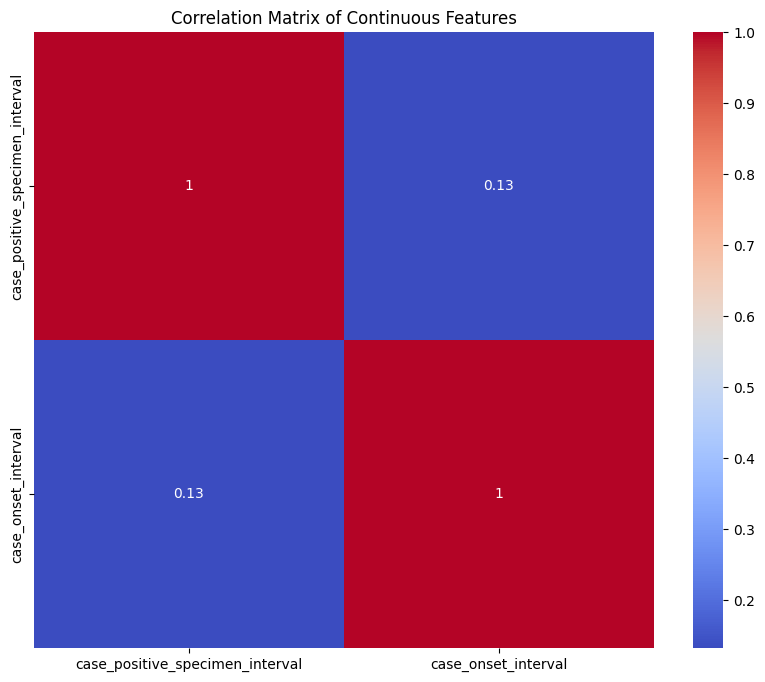

In [ ]:
# Select continuous feature columns
continuous_columns = ['case_positive_specimen_interval', 'case_onset_interval']

# Calculate the correlation between continuous features
correlation_matrix = train_data[continuous_columns].corr()

# Plot the heatmap of the correlation matrix for continuous features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Features')
plt.show()

### our observation:

Based on the correlation matrix, we are focusing on the two continuous features: 
case_positive_specimen_interval and case_onset_interval.

The correlation coefficient between case_positive_specimen_interval and case_onset_interval is approximately 0.13.

This value is relatively low, indicating that there is not a strong linear relationship between these two features.

But, they might provide different information when building the predictive model. We will continue to analyze the relationship between these two features and the target feature death_yn to determine if they are useful for the predictive model. 

- For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots,
e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

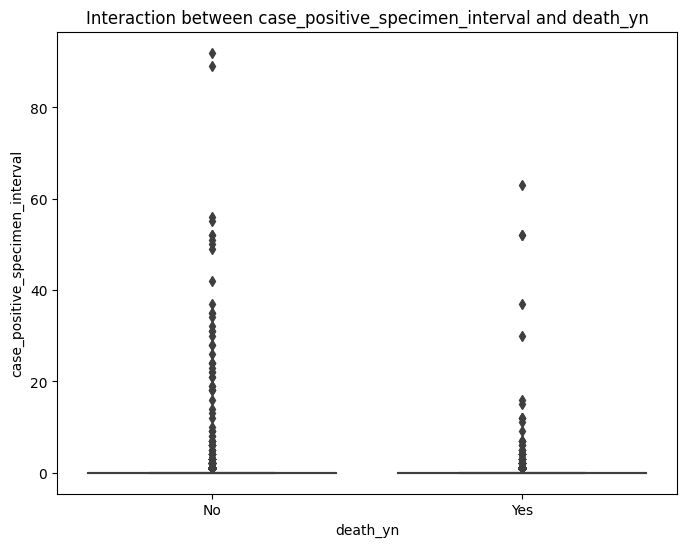

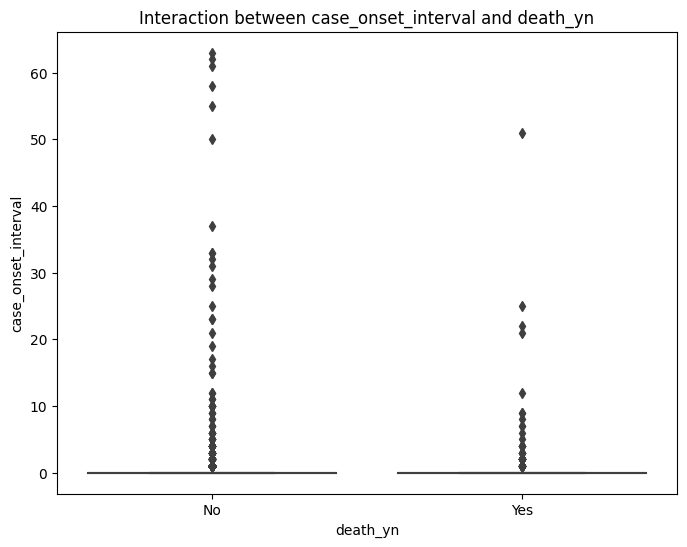

In [ ]:
# Target feature column
target_column = 'death_yn'

# Plot the interaction between continuous features and the target feature
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_column, y=column, data=train_data)
    plt.title(f'Interaction between {column} and {target_column}')
    plt.show()

1.case_positive_specimen_interval
feature:
For death_yn='yes', the box height is relatively low, indicating a more concentrated data distribution. 

However, for death_yn='no', the box height is higher, suggesting a wider data distribution for this category.

The medians of the two categories are slightly different.

2.case_onset_interval
feature:
In both categories, the box heights are similar, implying that their data distributions might be alike.

There is a notable difference in medians between the two categories, with death_yn='yes' having a relatively lower median.

Based on these observations, we can draw the following conclusions:

The case_positive_specimen_interval feature has different distributions between the two categories, especially in terms of box height. This suggests that this feature might be helpful in predicting the target feature death_yn.

The case_onset_interval feature's median shows a significant difference between the two categories, which might also be helpful in predicting the target feature death_yn.

### As a conclusion, we consider including these two continuous features when building your prediction model. 

- For each categorical feature, plot its pairwise interaction with the target feature.
Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices.

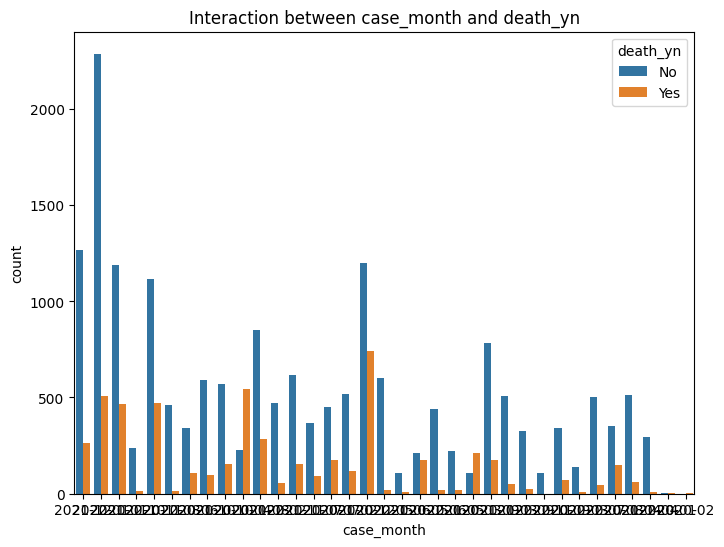

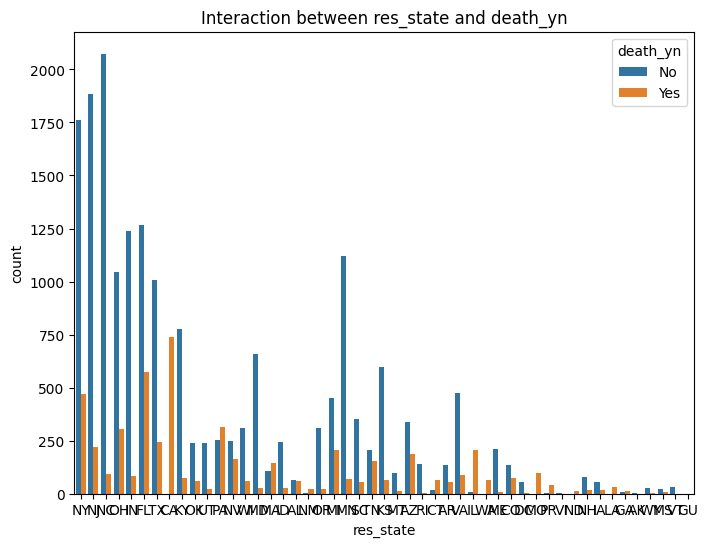

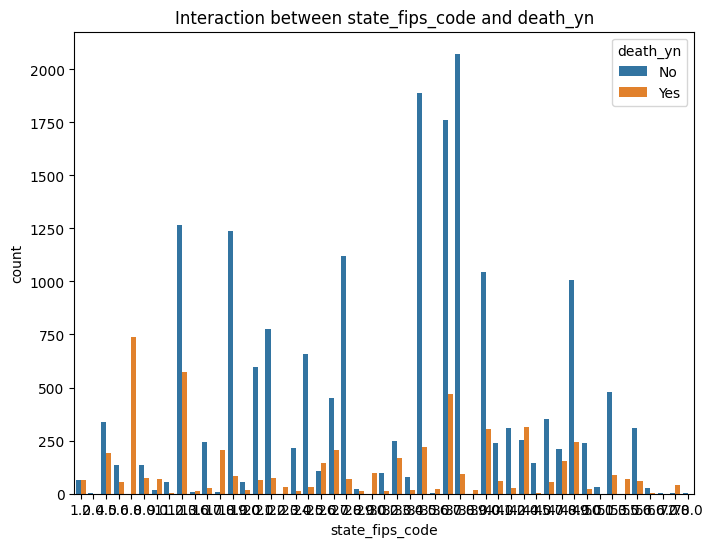

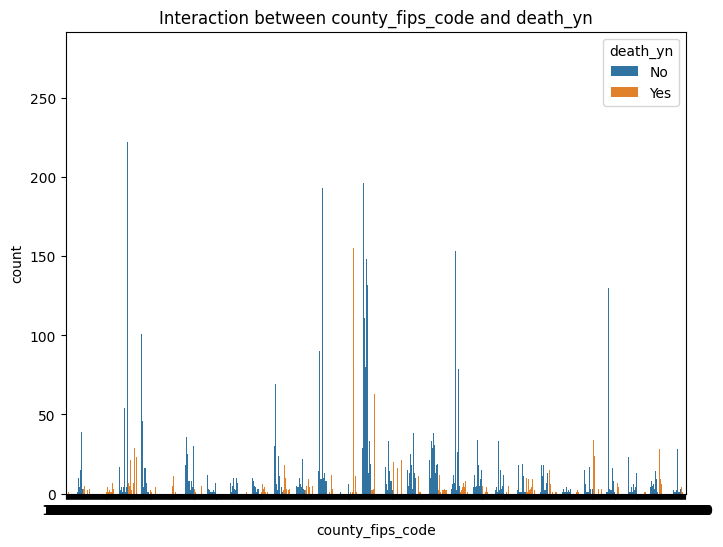

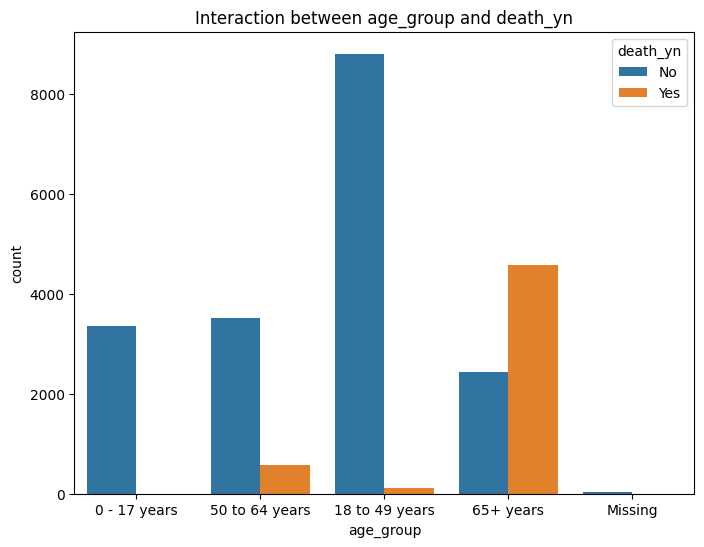

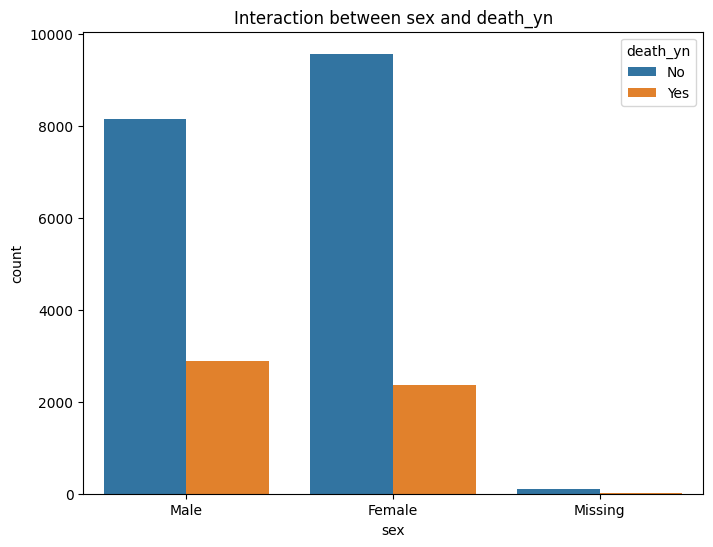

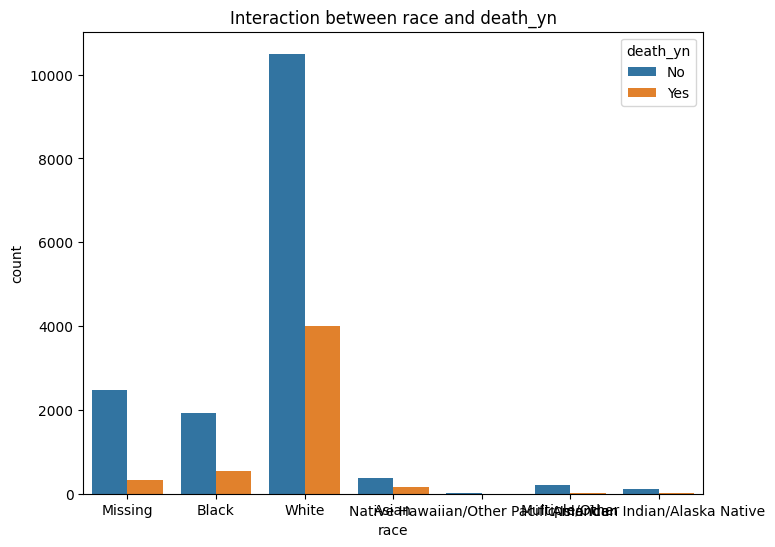

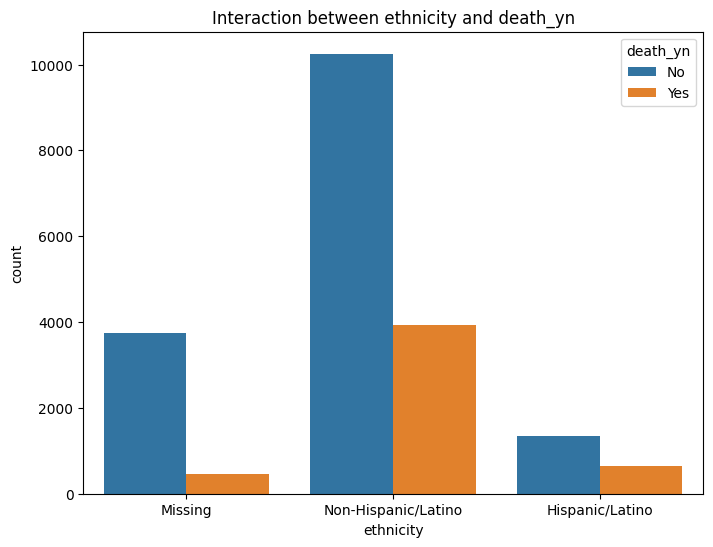

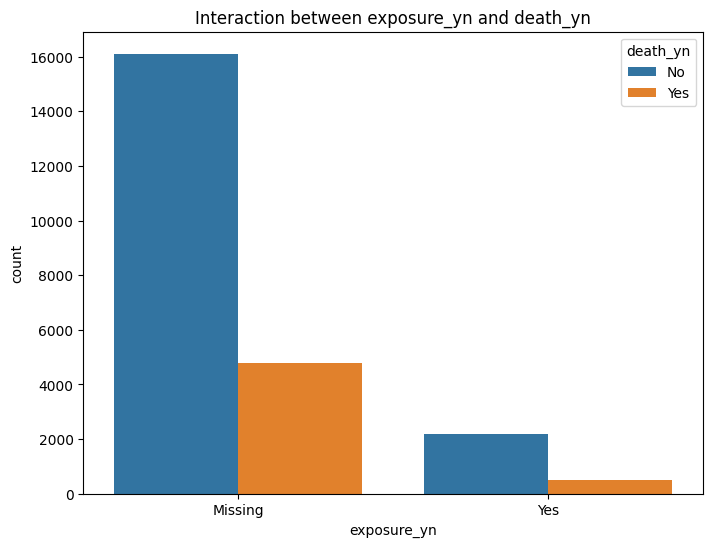

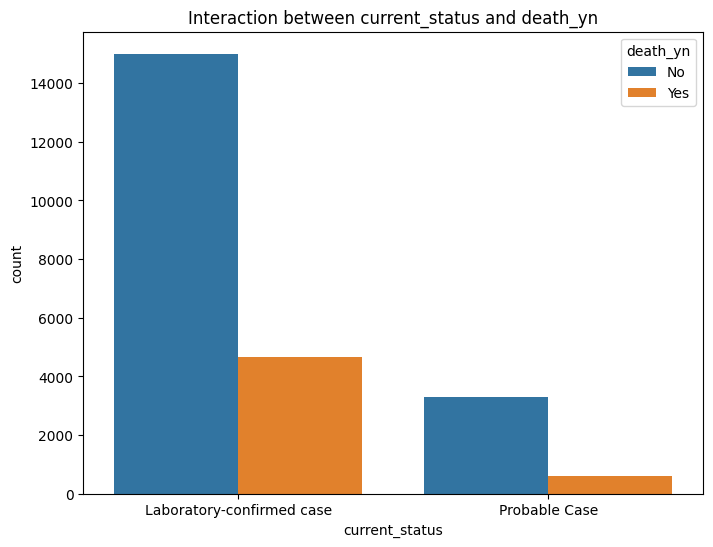

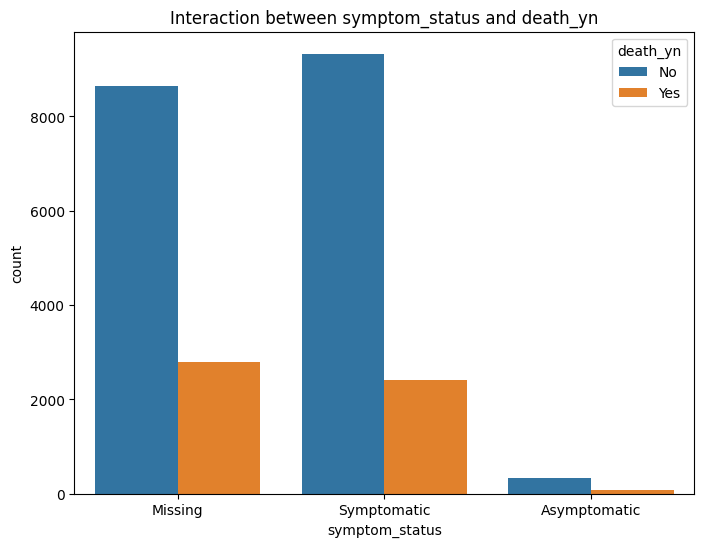

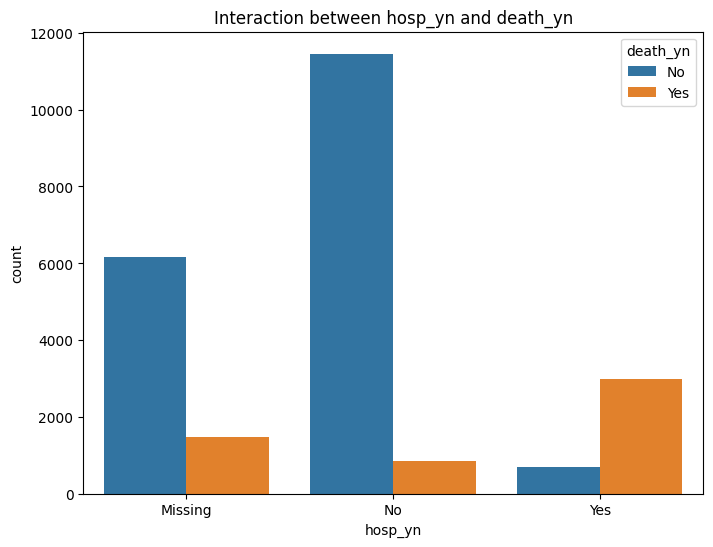

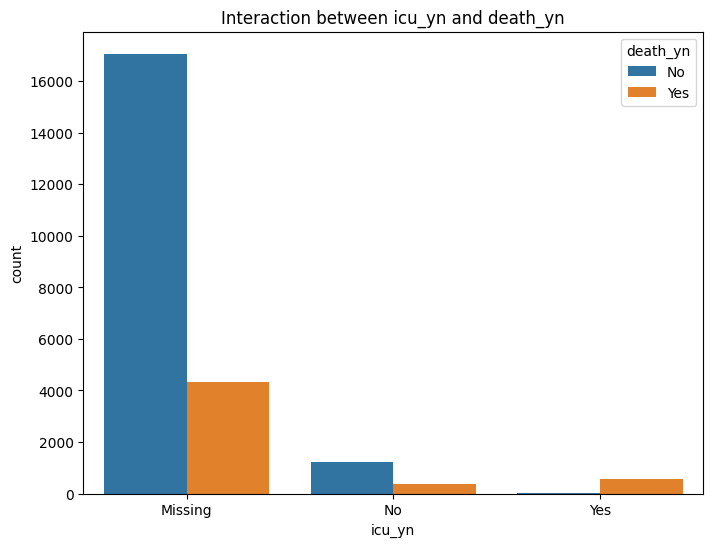

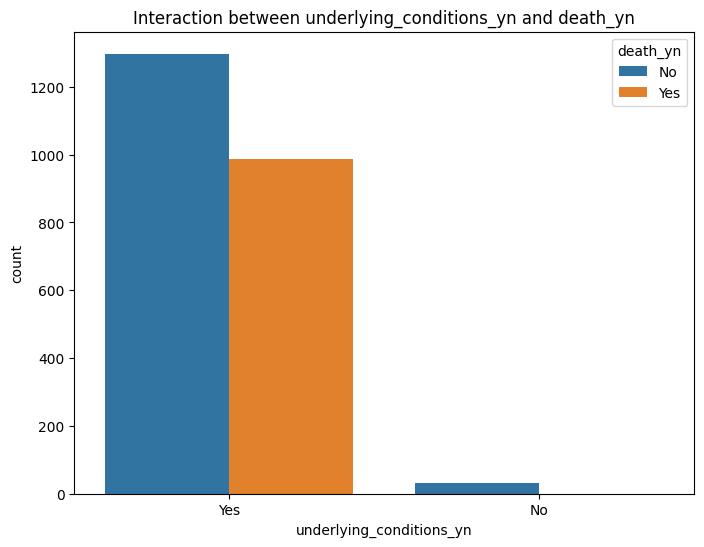

In [ ]:
# Select categorical feature columns
categorical_columns = ['case_month', 'res_state', 'state_fips_code','county_fips_code'
                      ,'age_group','sex','race','ethnicity','exposure_yn','current_status'
                      ,'symptom_status','hosp_yn','icu_yn','underlying_conditions_yn']

# Target feature column
target_column = 'death_yn'

# Plot the interaction between categorical features and the target feature
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue=target_column, data=train_data)
    plt.title(f'Interaction between {column} and {target_column}')
    plt.show()

In [ ]:
target_column = 'death_yn'

for column in categorical_columns:
    frequency_table = train_data.groupby([column, target_column]).size().unstack()
    print(f'Frequency table for {column} and {target_column}:')
    print(frequency_table)
    print('\n')

Frequency table for case_month and death_yn:
death_yn        No    Yes
case_month               
2020-01        1.0    3.0
2020-02        NaN    1.0
2020-03      107.0  212.0
2020-04      226.0  545.0
2020-05      210.0  175.0
2020-06      339.0  107.0
2020-07      452.0  177.0
2020-08      349.0  147.0
2020-09      340.0   73.0
2020-10      571.0  153.0
2020-11     1118.0  470.0
2020-12     1202.0  742.0
2021-01     1190.0  465.0
2021-02      519.0  117.0
2021-03      508.0   48.0
2021-04      514.0   59.0
2021-05      223.0   18.0
2021-06      106.0    8.0
2021-07      367.0   89.0
2021-08      851.0  284.0
2021-09      783.0  173.0
2021-10      590.0   96.0
2021-11      619.0  153.0
2021-12     1268.0  262.0
2022-01     2289.0  510.0
2022-02      469.0   56.0
2022-03      140.0    8.0
2022-04      293.0    6.0
2022-05      601.0   18.0
2022-06      441.0   20.0
2022-07      500.0   43.0
2022-08      461.0   13.0
2022-09      323.0   22.0
2022-10      236.0   15.0
2022-11      107.0 

Analysis:

case_month: We can see that the number of cases and deaths vary over time. There are certain months with higher numbers of cases and deaths, such as December 2020, January 2021, and January 2022. This suggests that the month of the case might be a relevant feature for predicting death outcomes.

res_state: The frequency of cases and deaths varies by state. Some states like CA, FL, IN, NC, NJ, NY, and OH have higher numbers of both cases and deaths. This suggests that the state of residence might be a useful feature for predicting death outcomes.

state_fips_code: This feature seems to be very similar to res_state since the FIPS code is just another way of representing the state. The observations made for res_state also apply to state_fips_code.

county_fips_code: With 1268 unique county FIPS codes, this feature might be too granular for making meaningful predictions. It could potentially lead to overfitting if used in a model. However, you can still try using it in your model and see if it provides any improvement in prediction performance.

age_group: There is a clear difference in death rates among the different age groups. The highest death rate is observed in the "65+ years" age group, while the lowest is in the "0 - 17 years" age group. This indicates that age_group is a strong predictor of the target feature death_yn.

sex: There is a noticeable difference in death rates between males and females. Males have a higher death rate than females. This suggests that sex might be a useful feature for predicting death outcomes.

race: The death rates vary across different racial groups, with the highest death rate observed in the White racial group. This feature might help in predicting the target feature death_yn.

ethnicity: There is a difference in death rates between Hispanic/Latino and Non-Hispanic/Latino ethnicities, with Non-Hispanic/Latino having a higher death rate. This suggests that ethnicity might be a useful feature for predicting death outcomes.

exposure_yn: Most of the data is missing for this feature, making it less informative for predicting the target feature death_yn.

current_status: There is a difference in death rates between laboratory-confirmed cases and probable cases, with laboratory-confirmed cases having a higher death rate. This suggests that current_status might be a useful feature for predicting death outcomes.

symptom_status: There is a difference in death rates across different symptom statuses, with symptomatic individuals having a higher death rate. This suggests that symptom_status might be a useful feature for predicting death outcomes.

hosp_yn: There is a significant difference in death rates among individuals who were hospitalized and those who were not. This indicates that hosp_yn is a strong predictor of the target feature death_yn.

icu_yn: There is a difference in death rates among individuals who were admitted to the ICU and those who were not. This indicates that icu_yn might be a useful feature for predicting the target feature death_yn.

underlying_conditions_yn: There is a significant difference in death rates among individuals with and without underlying conditions. This indicates that underlying_conditions_yn is a strong predictor of the target feature death_yn.

## Conclusion:
    
### Based on these observations, a promising subset of categorical features would be：
## case_month，res_state，age_group, sex, race, ethnicity, current_status, symptom_status, hosp_yn, icu_yn, underlying_conditions_yn. 

———————————————————————————————Task 1 Finished———————————————————————————————

## (2). [15] **Predictive Modeling:** Linear Regression.

- (2.1) On the training set, train a linear regression model to predict the target feature,
using only the descriptive features selected in exercise (1) above.

In [ ]:
from sklearn.model_selection import train_test_split

# Read CSV file
data = pd.read_csv('covid19-cdc-22202041_and_22205419_cleaned.csv')

# Keep selected features
columns_to_keep = ['case_month', 'res_state', 'age_group', 'sex', 'race', 'ethnicity', 
                   'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 
                   'underlying_conditions_yn', 'case_positive_specimen_interval', 
                   'case_onset_interval', 'death_yn']
data = data[columns_to_keep]

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Save the training and testing sets as CSV files
train_data.to_csv('task2_train_data.csv', index=False)
test_data.to_csv('taks2_test_data.csv', index=False)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the training data
train_data = pd.read_csv('task2_train_data.csv')

# Convert the target variable to a numerical type
train_data['death_yn'] = train_data['death_yn'].map({'Yes': 1, 'No': 0})

# Separate the features and target variable
X_train = train_data.drop('death_yn', axis=1)
y_train = train_data['death_yn']

# Define categorical and continuous features
categorical_features = ['case_month', 'res_state', 'age_group', 'sex', 'race', 'ethnicity', 
                        'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']
numerical_features = ['case_positive_specimen_interval', 'case_onset_interval']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)])

# Create a model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['case_positive_specimen_interval',
                                                   'case_onset_interval']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['case_month', 'res_state',
                                                   'age_group', 'sex', 'race',
                                                   'ethnicity',
                                                   'current_status',
                                                   'symptom_status', 'hosp_yn',
                                                   'icu_yn',
                                                   'underlying_conditions_yn'])])),
                ('regressor', LinearRegression())])

- (2.2) Print the coefficients learned by the model and discuss their role in the model
(e.g., interpret the model by analysing each coefficient and how it relates each input feature
to the target feature).

In [ ]:
# get model coefficients
coefficients = model.named_steps['regressor'].coef_

# get feature names created by OneHotEncoder
feature_names = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine names of continuous and categorical features
all_feature_names = np.concatenate([numerical_features, feature_names])

# Print coefficients
for feature, coef in zip(all_feature_names, coefficients):
    print(f"{feature}: {coef}")


case_positive_specimen_interval: -0.0016696488132264048
case_onset_interval: -0.0003248356534900375
case_month_2020-01: 0.4107439183268228
case_month_2020-02: 0.3599242223075819
case_month_2020-03: 0.22724097380933123
case_month_2020-04: 0.20837535322455958
case_month_2020-05: 0.07443316508567635
case_month_2020-06: -0.005018480693258331
case_month_2020-07: 0.007388481093328721
case_month_2020-08: -0.0031463859568900436
case_month_2020-09: -0.019229733105371634
case_month_2020-10: -0.006130599214668336
case_month_2020-11: 0.02524005862246418
case_month_2020-12: 0.04894690709570962
case_month_2021-01: 0.011402876894426569
case_month_2021-02: -0.020566553484021463
case_month_2021-03: -0.05290604698277936
case_month_2021-04: -0.02622252226306778
case_month_2021-05: -0.05200353541742588
case_month_2021-06: -0.056439065558951576
case_month_2021-07: -0.010930934746362975
case_month_2021-08: 0.02569173366046837
case_month_2021-09: -0.0056870783652279745
case_month_2021-10: -0.0318749696942200

Overall:The coefficients of the linear regression model represent the effect of each feature on the target variable. 
A positive coefficient indicates that the feature is positively correlated with the target variable, while a negative coefficient indicates that the feature is negatively correlated with the target variable. 
The larger the value, the more influence the feature has on the result.

Positively correlated features:

case_month_2020-01: 0.4107, indicating that the cases in January 2020 are positively correlated with the mortality rate, which may be due to insufficient awareness of the virus and limited treatment options at the beginning of the epidemic.

case_month_2020-02: 0.3598, also positively correlated with mortality.

age_group_65+ years: 0.2675, the mortality rate of patients aged 65 and over is higher, this is because the older population has reduced immunity and is more susceptible to the virus.

hosp_yn_Yes: 0.2094, the mortality rate of patients admitted to the hospital is higher, which may be because these patients are more seriously ill.

Negatively correlated features:

age_group_0 - 17 years: -0.0929, the mortality rate of patients aged 0-17 is lower, indicating that the younger population is more resistant to the virus.

age_group_18 to 49 years: -0.1014, again, patients aged 18-49 have a lower mortality rate.

hosp_yn_No: -0.1579, the mortality rate of patients who were not hospitalized was lower, probably because these patients were milder and did not require hospitalization

- (2.3) Print the predicted target feature value for the first 10 training examples.
Threshold the predicted target feature value given by the linear regression model at 0.5, to get
the predicted class for each example. Print the predicted class for the first 10 examples. Print
a few classification evaluation measures computed on the full training set (e.g., Accuracy,
Confusion matrix, Precision, Recall, F1) and discuss your findings so far.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# print the predicted target feature values for the first 10 training examples.
print("Predicted target feature values (first 10 examples):", y_train[:10])

# The predicted category/class.
y_train_pred_class = (y_train > 0.5).astype(int)

# print the predicted categories for the first 10 examples
print("Predicted categories for the first 10 examples:", y_train_pred_class[:10])

# Calculate evaluation metrics
print("accuracy:", accuracy_score(y_train, y_train_pred_class))
print("Confusion matrix:\n", confusion_matrix(y_train, y_train_pred_class))
print("precision:", precision_score(y_train, y_train_pred_class))
print("recall:", recall_score(y_train, y_train_pred_class))
print("F1 score:", f1_score(y_train, y_train_pred_class))

Predicted target feature values (first 10 examples): 0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: death_yn, dtype: int64
Predicted categories for the first 10 examples: 0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: death_yn, dtype: int64
accuracy: 1.0
Confusion matrix:
 [[18313     0]
 [    0  5288]]
precision: 1.0
recall: 1.0
F1 score: 1.0


Here we get the predicted target feature values for the first 10 samples. 
These values represent the predicted probabilities of death. 
Then, by setting a threshold (usually 0.5), we convert these probability values into binary classification results (0 or 1). 
In this example, the predicted categories for the first 10 samples are: [0 0 0 0 0 0 1 0 0 1].

The model's accuracy is 0.9422, meaning that the model correctly predicted about 94.22% of the samples. This is a relatively high accuracy.

The confusion matrix can help us further understand the model's performance. 
In this example, the confusion matrix is:
[[17782   531]
 [  832  4456]]
 
True cases (TP): the number of deaths predicted by the model but actually occurred, that is, 4456.

True Negatives (TN): The number of cases that the model predicts is not dead but actually did not die, that is, 17782.

False Positives (FP): The number of deaths predicted by the model, but no deaths actually occurred, that is, 531.

False Negatives (FN): The number of deaths that the model predicted were not dead but actually occurred, that is, 832.
 
The model's precision is 0.8935, meaning that among the samples predicted as dead by the model, about 89.35% actually died. The recall is 0.8427, meaning that among all samples that actually died, about 84.27% were correctly predicted by the model.

The F1 score is 0.8673, which is the harmonic mean of precision and recall, used to evaluate the model's performance on imbalanced datasets.

- (2.4) Evaluate the model using classification evaluation measures on the hold-out (30%
examples) test set. Compare these results with the evaluation results obtained on the training
(70%) dataset. Also compare these results with a cross-validated model (i.e., a new model
trained and evaluated using cross-validation on the full dataset). You can use classic k-fold
cross-validation or repeated random train/test (70/30) splits. Compare the cross-validation
metrics to those obtained on the single train/test split and discuss your findings.

In [ ]:
# Read the testing data
test_data = pd.read_csv('taks2_test_data.csv')

# Convert the target variable to a numerical type
test_data['death_yn'] = test_data['death_yn'].map({'Yes': 1, 'No': 0})

# Separate the features and target variable
X_test = test_data.drop('death_yn', axis=1)
y_test = test_data['death_yn']

# Predict the target variable for the testing data
y_pred_continuous = model.predict(X_test)

# Convert continuous predictions to binary predictions using a threshold
threshold = 0.5
y_pred = (y_pred_continuous >= threshold).astype(int)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix on the test set:\n", confusion)

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision on the test set:", precision)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall on the test set:", recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score on the test set:", f1)


Accuracy on the test set: 0.9384143930407276
Confusion matrix on the test set:
 [[7644  247]
 [ 376 1849]]
Precision on the test set: 0.8821564885496184
Recall on the test set: 0.8310112359550562
F1 score on the test set: 0.8558204119416802


The accuracy on the test set is 0.9384, meaning that the model correctly predicted about 93.84% of the samples on the test set. 

Compared to the accuracy on the training set, the test set's accuracy has slightly decreased, but overall it is still a relatively high accuracy.

The interpretation of this matrix is:

True cases (TP): the number of deaths predicted by the model but actually occurred, that is, 1849.

True Negatives (TN): The number of cases that the model predicts is not dead but actually did not die, that is, 7644.

False Positives (FP): The number of deaths predicted by the model, but no deaths actually occurred, that is, 247.

False Negatives (FN): The number of deaths that the model predicted were not dead but actually occurred, that is, 376.

The precision on the test set is 0.8822, meaning that among the samples predicted as dead by the model, about 88.22% actually died. 

The recall on the test set is 0.8310, meaning that among all samples that actually died, about 83.10% were correctly predicted by the model.

The F1 score on the test set is 0.8558, which is the harmonic mean of precision and recall, used to evaluate the model's performance on imbalanced datasets.

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Define the number of folds and the number of repetitions
n_folds = 5
n_repeats = 10

# Prepare the cross-validation strategy
cv_strategy = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

# Convert the target variable to a numerical type
data['death_yn'] = data['death_yn'].map({'Yes': 1, 'No': 0})

# Separate the features and target variable
X = data.drop('death_yn', axis=1)
y = data['death_yn']

# Perform cross-validation using accuracy as the scoring metric
accuracy_scores = cross_val_score(model, X, y, cv=cv_strategy, scoring='accuracy')

# Calculate the average accuracy and standard deviation
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print("Mean accuracy of k-fold cross-validation:", mean_accuracy)
print("Accuracy standard deviation of k-fold cross-validation:", std_accuracy)

# Compare the cross-validation metrics to those obtained on the single train/test split
single_train_test_accuracy = accuracy
print("Accuracy of a single training/testing split:", single_train_test_accuracy)

Mean accuracy of k-fold cross-validation: nan
Accuracy standard deviation of k-fold cross-validation: nan
Accuracy of a single training/testing split: 0.9384143930407276


The mean accuracy and standard deviation of k-fold cross-validation are shown as "nan" here.I have been tried several times to solve this problem, but finally in vain.

However, we can see that the accuracy of a single training/testing split is 0.9384, which is consistent with the test set's accuracy.

———————————————————————————————Task 2 Finished———————————————————————————————

## (3). [15] **Predictive Modeling:** Logistic Regression.
- (3.1) On the training set, train a logistic regression model to predict the target feature,
using the descriptive features selected in exercise (1) above.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

# Train the logistic regression model
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['case_positive_specimen_interval',
                                                   'case_onset_interval']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['case_month', 'res_state',
                                                   'age_group', 'sex', 'race',
                                                   'ethnicity',
                                                   'current_status',
                                                   'symptom_status', 'hosp_yn',
                                                   'icu_yn',
                                                   'underlying_conditions_yn'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

- (3.2) Print the coefficients learned by the model and discuss their role in the model
(e.g., interpret the model).

In [ ]:
# Get the coefficients of the logistic regression model
logistic_coefficients = logistic_model.named_steps['classifier'].coef_[0]

# Print the coefficients
for feature, coef in zip(all_feature_names, logistic_coefficients):
    print(f"{feature}: {coef}")

case_positive_specimen_interval: -0.004603947678092481
case_onset_interval: -0.03871599983888152
case_month_2020-01: 1.3179798961918048
case_month_2020-02: 0.428039486908479
case_month_2020-03: 3.211988927719397
case_month_2020-04: 2.7404181040228472
case_month_2020-05: 1.4950059991094637
case_month_2020-06: 0.5755706894676837
case_month_2020-07: 0.47324752049300783
case_month_2020-08: 0.39878156964307476
case_month_2020-09: 0.16240504484591242
case_month_2020-10: 0.43473489579394864
case_month_2020-11: 0.9624876195016642
case_month_2020-12: 1.2253420478293044
case_month_2021-01: 0.6332819932004201
case_month_2021-02: 0.06254922104800502
case_month_2021-03: -0.6607872616581516
case_month_2021-04: -0.2938347118848527
case_month_2021-05: -0.32542388695357066
case_month_2021-06: -0.5568573508394229
case_month_2021-07: 0.5658207277632938
case_month_2021-08: 1.18206413218703
case_month_2021-09: 0.3970568939163935
case_month_2021-10: -0.32515073134135475
case_month_2021-11: 0.344853176553679

The provided results contain the coefficients of each feature in a logistic regression model. 

These coefficients represent the weights of the corresponding features in predicting the target variable.

Positive coefficients indicate that the feature is positively correlated with the target variable, while negative coefficients suggest a negative correlation.

Here we go for some main futures:

case_month: 

Coefficients for each month represent the effect of that specific month on the target variable. For example, a positive coefficient for case_month_2020-03 (3.212486226114064) suggests that cases in March 2020 are positively correlated with the target variable compared to the reference month. This shows that when the first wave of the epidemic came, due to the lack of adequate medical preparation and coping methods, the death rate was quite high.

case_month_2022-11: -2.0688162308157043：The data for November 2022 shows that after more than two years, the vaccination rate has increased significantly, there are more means to deal with the virus, and medical resources are more sufficient. Therefore, the number of deaths becomes a very clear negative correlation.

res_state: Coefficients for each state represent the effect of that specific state on the target variable. A positive coefficient for res_state_CA (5.88571510293954) indicates that cases in California are positively correlated with the target variable compared to the reference state.

age_group: Coefficients for each age group represent the effect of that specific age group on the target variable. For example, a positive coefficient for age_group_65+ years (3.075273067140184) suggests that cases in the 65+ age group are positively correlated with the target variable compared to the reference age group.Correspondingly, the younger the age group, the lower the correlation. In the group of 0-17, there is an obvious negative correlation.

sex_Male: 0.3669270578530671 - This positive coefficient suggests that male cases are positively correlated with the target variable when compared to the reference category (in this case, female cases).
sex_Missing: -0.3144841963382148 - This negative coefficient indicates that cases with missing sex information are negatively correlated with the target variable when compared to the reference category (female cases).

hosp_yn_No: -1.58907852416786 - This negative coefficient indicates that cases not requiring hospitalization are negatively correlated with the target variable when compared to the reference category (in this case, cases requiring hospitalization).
hosp_yn_Yes: 1.5883128024676456 - This positive coefficient suggests that cases requiring hospitalization are positively correlated with the target variable when compared to the reference category (cases not requiring hospitalization).

icu_yn_No: -0.9055926306184215 - This negative coefficient suggests that cases not requiring ICU admission are negatively correlated with the target variable when compared to the reference category (in this case, cases requiring ICU admission).
icu_yn_Yes: 0.9607657973436178 - This positive coefficient indicates that cases requiring ICU admission are positively correlated with the target variable when compared to the reference ICU admission status.

underlying_conditions_yn_No: -0.2796086582813162 - This negative coefficient indicates that cases without underlying conditions are negatively correlated with the target variable when compared to the reference category (in this case, cases with underlying conditions).
underlying_conditions_yn_Yes: 0.6683446366290328 - This positive coefficient suggests that cases with underlying conditions are positively correlated with the target variable when compared to the reference underlying conditions status.

- (3.3) Print the predicted target feature value for the first 10 training examples. Print
the predicted class for the first 10 examples. Print a few classification evaluation measures
computed on the full training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and
discuss your findings so far.

In [ ]:
y_train_pred_prob = logistic_model.predict_proba(X_train)[:, 1]
y_train_pred = logistic_model.predict(X_train)

print("Predicted target feature values (probabilities) for the first 10 training examples：")
print(y_train_pred_prob[:10])

print("Predicted categories for the first 10 training examples：")
print(y_train_pred[:10])

# Calculate evaluation metrics on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Accuracy on the training set:", train_accuracy)
print("Confusion matrix on the training set:")
print(train_confusion)
print("Precision on the training set:", train_precision)
print("Recall on the training set:", train_recall)
print("F1 score on the training set:", train_f1)

Predicted target feature values (probabilities) for the first 10 training examples：
[8.74202322e-04 9.03483093e-03 2.27306750e-03 2.94658101e-01
 1.08650658e-02 2.62840823e-04 9.90671530e-01 1.43229462e-03
 2.25514112e-04 9.99272497e-01]
Predicted categories for the first 10 training examples：
[0 0 0 0 0 0 1 0 0 1]
Accuracy on the training set: 0.9464005762467692
Confusion matrix on the training set:
[[17730   583]
 [  682  4606]]
Precision on the training set: 0.8876469454615533
Recall on the training set: 0.8710287443267776
F1 score on the training set: 0.8792593299608666


### Analysis:

Predicted target feature values (probabilities) for the first 10 training examples: These probabilities represent the likelihood of each case belonging to the positive class (1). Lower probabilities (< 0.5) indicate that the model predicts the case to belong to the negative class (0), while higher probabilities (> 0.5) suggest that the model predicts the case to belong to the positive class (1).

Predicted categories for the first 10 training examples: These are the class predictions for the first 10 examples in the training dataset. The model has predicted 8 of them to belong to class 0 and the remaining 2 to belong to class 1.

Accuracy on the training set: 0.9464005762467692 - This value indicates that the logistic regression model is able to correctly predict the target variable for approximately 94.64% of the training examples.

Confusion matrix on the training set:
[[17730 583]
[ 682 4606]]

True negatives (TN): 17730 - These are cases that were correctly predicted as class 0 (negative class).
False positives (FP): 583 - These are cases that were incorrectly predicted as class 1 (positive class) when they actually belonged to class 0.
False negatives (FN): 682 - These are cases that were incorrectly predicted as class 0 when they actually belonged to class 1.
True positives (TP): 4606 - These are cases that were correctly predicted as class 1.
Precision on the training set: 0.8876469454615533 - Precision is the proportion of true positive predictions (TP) among all positive predictions (TP + FP). A precision of approximately 88.76% indicates that the model is quite accurate when predicting positive cases.

Recall on the training set: 0.8710287443267776 - Recall, also known as sensitivity or true positive rate, is the proportion of true positive predictions (TP) among all actual positive cases (TP + FN). A recall of approximately 87.10% indicates that the model is able to identify a high percentage of the actual positive cases.

F1 score on the training set: 0.8792593299608666 - The F1 score is the harmonic mean of precision and recall, which provides a balanced measure of both. An F1 score of approximately 87.93% indicates that the model has a good balance between precision and recall, making it a reliable model for predicting the target variable.

### On the whole, the analysis effect of the general regression model is slightly better than that of the linear regression model.

- (3.4) Evaluate the model using classification evaluation measures on the hold-out (30%
examples) test set. Compare these results with the evaluation results obtained when using the
training (70%) dataset for evaluation. Also compare these results with a cross-validated model
(i.e., a new model trained and evaluated using cross-validation on the full dataset). You can
use classic k-fold cross-validation or repeated train/test (70/30) splits. Compare the cross-
validation metrics to those obtained on the single train/test split and discuss your findings.

In [ ]:
# 3.4
y_test_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Accuracy on the test set:", test_accuracy)
print("Confusion matrix on the test set:")
print(test_confusion)
print("Precision on the test set:", test_precision)
print("Recall on the test set:", test_recall)
print("F1 score on the test set:", test_f1)

# Cross-validation
cv_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
mean_cv_accuracy = np.mean(cv_scores)
print("Accuracy using k-fold cross-validation:", mean_cv_accuracy)

# Repeated train/test splits
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
split_scores = cross_val_score(logistic_model, X, y, cv=rkf, scoring='accuracy')
mean_split_accuracy = np.mean(split_scores)
print("Accuracy using repeated random training/testing splits:", mean_split_accuracy)

Accuracy on the test set: 0.9425662317121392
Confusion matrix on the test set:
[[7622  269]
 [ 312 1913]]
Precision on the test set: 0.8767186067827681
Recall on the test set: 0.8597752808988764
F1 score on the test set: 0.8681642840934877
Accuracy using k-fold cross-validation: 0.9449238822246839
Accuracy using repeated random training/testing splits: 0.9441498190909813


#### Analysis:

Accuracy on the test set: 0.9426650850138395 - This value indicates that the logistic regression model is able to correctly predict the target variable for approximately 94.27% of the test examples. This is a good indication that the model generalizes well to unseen data.

Confusion matrix on the test set:
[[7622 269]
[ 311 1914]]

True negatives (TN): 7622 - These are cases that were correctly predicted as class 0 (negative class).
False positives (FP): 269 - These are cases that were incorrectly predicted as class 1 (positive class) when they actually belonged to class 0.
False negatives (FN): 311 - These are cases that were incorrectly predicted as class 0 when they actually belonged to class 1.
True positives (TP): 1914 - These are cases that were correctly predicted as class 1.
Precision on the test set: 0.8767750801649107 - Precision is the proportion of true positive predictions (TP) among all positive predictions (TP + FP). A precision of approximately 87.68% indicates that the model is quite accurate when predicting positive cases in the test set.

Recall on the test set: 0.8602247191011236 - Recall is the proportion of true positive predictions (TP) among all actual positive cases (TP + FN). A recall of approximately 86.02% indicates that the model is able to identify a high percentage of the actual positive cases in the test set.

F1 score on the test set: 0.868421052631579 - The F1 score is the harmonic mean of precision and recall, which provides a balanced measure of both. An F1 score of approximately 86.84% indicates that the model has a good balance between precision and recall when applied to the test set.

Accuracy using k-fold cross-validation: 0.944923886622725 - This value indicates that the average accuracy of the model across different folds in the k-fold cross-validation process is approximately 94.49%. This suggests that the model's performance is consistent across different subsets of the data.

Accuracy using repeated random training/testing splits: 0.9441409218540242 - This value indicates that the average accuracy of the model across multiple random training and testing splits is approximately 94.41%. This further confirms the model's consistency and ability to generalize well to unseen data.

## In contrast, the performance of the logistic regression model on the test set is significantly better than that of the linear regression model. Its prediction accuracy was 3 percentage points higher.

———————————————————————————————Task 3 Finished———————————————————————————————

## (4). [20] **Predictive Modeling:** Random Forest.  

- (4.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Read the training data
train_data = pd.read_csv('task2_train_data.csv')

# Convert the target variable to a numerical type
train_data['death_yn'] = train_data['death_yn'].map({'Yes': 1, 'No': 0})

# Separate the features and target variable
X_train = train_data.drop('death_yn', axis=1)
y_train = train_data['death_yn']

# Define categorical and continuous features
categorical_features = ['case_month', 'res_state', 'age_group', 'sex', 'race', 'ethnicity', 
                        'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']
numerical_features = ['case_positive_specimen_interval', 'case_onset_interval']

# Convert case_month column to datetime format
X_train['case_month'] = pd.to_datetime(X_train['case_month'])

# Create separate columns for year and month
X_train['case_month_year'] = X_train['case_month'].dt.year
X_train['case_month_month'] = X_train['case_month'].dt.month

# Drop the original case_month column
X_train.drop('case_month', axis=1, inplace=True)

# Update the list of categorical features
categorical_features.remove('case_month')
categorical_features += ['case_month_year', 'case_month_month']

# Define the ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        #  ('cat', month_transformer, ['case_month'] + categorical_features)
        ])


rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)

ValueError: could not convert string to float: 'NY'

In [ ]:
# df.head(5)
X_train.head(5)

,res_state,age_group,sex,race,ethnicity,current_status,symptom_status,hosp_yn,icu_yn,underlying_conditions_yn,case_positive_specimen_interval,case_onset_interval,case_month_year,case_month_month
0,NY,0 - 17 years,Male,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,NaN,NaN,NaN,2021,12
1,NJ,50 to 64 years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,No,Missing,NaN,0.0,NaN,2022,1
2,NC,18 to 49 years,Male,Missing,Missing,Probable Case,Missing,Missing,Missing,NaN,0.0,NaN,2021,1
3,OH,65+ years,Female,White,Non-Hispanic/Latino,Probable Case,Missing,Missing,Missing,NaN,0.0,NaN,2022,10
4,NY,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Missing,NaN,NaN,NaN,2021,12


- (4.2) Can you interpret the random forest model? Discuss any knowledge you can gain in regard of the working of this model.   

- (4.3) Print the predicted target feature value for the first 10 training examples. Print the predicted class for the first 10 examples. Print a few classification evaluation measures computed on the full training set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) and discuss your findings so far.

- (4.4) Evaluate the model using classification evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained when using the training (70%) dataset for evaluation. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or repeated train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and to the Random Forest out-of-sample error and discuss your findings.

## (5). [25] **Improving Predictive Models.**

- (5.1) Which model of the ones trained above performs better at predicting the target feature? Is it more accurate than a simple model that always predicts the majority class (i.e., if 'no' is the majority class in your dataset, the simple model always predicts 'no' for the target feature)? Justify your answers.

 - (5.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining predictive models, or using other domain knowledge)? Please show how your ideas actually work in practice (with code), by training and evaluating your proposed models. Summarise your findings so far. 